In [1]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

card_images = []


def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

def play():
  print("Debug: play()")
  load_image()
  # show_test()

def show_test():
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card_images[5])
  plt.subplot(1,6,2)
  plt.axis("off")
  plt.imshow(card_images[6])
  plt.show()

play()

Debug: play()


In [2]:
import cv2 as cv
print(cv.__version__)


4.10.0


Certainly! Let's break down the code in detail, explaining each part with corresponding code snippets.

### 1. **Importing Libraries**

```python
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
```

- `requests`: To fetch data from the web.
- `cv2` (OpenCV): For image processing tasks.
- `os`: To handle file operations.
- `matplotlib.pyplot`: For plotting and visualizing images.
- `numpy`: For numerical operations on arrays, especially for image manipulation.

### 2. **Global Variable**

```python
card_images = []
```

- `card_images`: A list that will hold individual images of cards extracted from the main image.

### 3. **Defining `load_image` Function**

```python
def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
```

- **Variables:**
  - `image_name`: Filename of the image that will be processed.
  - `vsplit_number`: Number of vertical splits (how many rows of cards).
  - `hsplit_number`: Number of horizontal splits (how many columns of cards).

```python
  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
```

- **Download Image if Not Present:**
  - Checks if `cards.jpg` exists in the current directory.
  - If not, downloads the image from a specified URL.
  - Saves the image locally as `cards.jpg`.

```python
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
```

- **Read and Convert Image:**
  - Uses `cv2.imread()` to read the image from the file.
  - Converts the image from BGR to RGB using `cv2.cvtColor()` to match the color format used by `matplotlib`.

```python
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
```

- **Crop Image:**
  - Gets the dimensions of the image.
  - Crops the image to ensure it’s perfectly divisible by the number of vertical and horizontal splits. This avoids any extra space around the edges that could cause issues in splitting.

```python
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)
```

- **Split Image:**
  - Clears the `card_images` list to ensure it starts empty.
  - Uses `numpy` to split the cropped image vertically into `vsplit_number` parts (`np.vsplit`).
  - For each vertical part, splits it horizontally into `hsplit_number` parts (`np.hsplit`).
  - Appends each of these parts to the `card_images` list.

### 4. **Defining `play` Function**

```python
def play():
  load_image()
  show_test()
```

- **Purpose:**
  - Calls `load_image()` to process and split the card image.
  - Calls `show_test()` to display a subset of the images.

### 5. **Defining `show_test` Function**

```python
def show_test():
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card_images[5])
  plt.subplot(1,6,2)
  plt.axis("off")
  plt.imshow(card_images[6])
  plt.show()
```

- **Purpose:**
  - Displays specific card images using `matplotlib`.

- **Steps:**
  - **Subplot Configuration:**
    - `plt.subplot(1,6,1)`: Creates a subplot layout with 1 row and 6 columns, setting the first subplot.
    - `plt.axis("off")`: Hides the axis to focus on the image.
    - `plt.imshow(card_images[5])`: Displays the 6th image in the `card_images` list.
    - `plt.subplot(1,6,2)`: Sets up the second subplot.
    - `plt.axis("off")`: Hides the axis for the second image.
    - `plt.imshow(card_images[6])`: Displays the 7th image in the `card_images` list.
  - **Render Plot:**
    - `plt.show()`: Renders and displays the subplot.

### 6. **Execution**

```python
play()
```

- **Purpose:**
  - Executes the `play()` function to load and display the card images.

### Summary

1. **Image Download and Loading:**
   - Checks for the image file and downloads it if necessary.
   - Reads and converts the image for processing.

2. **Image Processing:**
   - Crops and splits the image into individual card images.
   - Stores these images in a global list.

3. **Displaying Images:**
   - Uses `matplotlib` to visualize specific card images from the list.

This code is designed for processing an image of a grid of cards, splitting it into individual card images, and displaying a few of them. Adjustments can be made for different numbers of cards or image formats as needed.

Debug: play()
10 of Diamonds


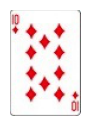

In [3]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image


def create_cards():
    cards.clear()
    marks = np.array(['Hearts', 'Clubs', 'Diamonds', 'Spades'])
    display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    numbers = np.array([11,2,3,4,5,6,7,8,9,10,10,10,10])
    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
          cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )




def show_cards(photo):
    print(f"{photo.display_name} of {photo.mark}")
    

def play():
    print('Debug: play()')
    
    load_image()
    create_cards()
    index = random.randint(0,51)
    image_to_display = cards[index]
    show_cards(image_to_display)
    show_test(index)

def show_test(i):
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card_images[i])
  # plt.subplot(1,6,2)
  # plt.axis("off")
  # plt.imshow(card_images[6])
  plt.show()


play()

Debug: play()
Jack of Hearts


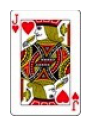

In [4]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

card_images = []
cards = []

def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13

  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)

  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]

  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image

def create_cards():
  cards.clear()
  marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
  display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
  numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_card(card):
  print(f"{card.display_name} of {card.mark}")
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card.image)
  plt.show()

def play():
  print('Debug: play()')
  load_image()
  create_cards()
  show_card(cards[10])

play()

In [5]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

card_images = []
cards = []
player = []

def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13

  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)

  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]

  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image


class Player:
    def __init__(self, name):
        self.name = name  # Assign the name attribute
        self.cards = []
        self.total_number = 0

class Human(Player):
    def __init__(self):
        super().__init__('You')  # Call parent init with fixed name

class Computer(Player):
    def __init__(self):
        super().__init__('Computer')  # Call parent init with fixed name


def create_cards():
  cards.clear()
  marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
  display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
  numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_card(card):
  print(f"{card.display_name} of {card.mark}")
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card.image)
  plt.show()

def play():
  print('Debug: play()')
  load_image()
  create_cards()
  # show_card(cards[10])

play()

Debug: play()


In [6]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

card_images = []
cards = []
players = []
def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image
    self.cards = []
    self.total_number = 0

class Player:
  def __init__(self, name):
    self.name = name
    self.cards = []
    self.total_number = 0

class Human(Player):
  def __init__(self):
    super().__init__('You')

class Computer(Player):
  def __init__(self):
    super().__init__('Computer')

def create_cards():
  cards.clear()
  marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
  display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
  numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_card(card):
  print(f"{card.display_name} of {card.mark}")
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card.image)
  plt.show()

def play():
  print('Debug: play()')
  load_image()
  create_cards()
  players.append(Computer())
  players.append(Human())

play()

Debug: play()


In [8]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image
    self.is_dealt = False

class Player:
  def __init__(self, name):
    self.name = name
    self.cards = []
    self.total_number = 0

class Human(Player):
  def __init__(self):
    super().__init__('You')

class Computer(Player):
  def __init__(self):
    super().__init__('Computer')

def create_cards():
  cards.clear()

  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_card(card):
  print(f"{card.display_name} of {card.mark}")
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card.image)
  plt.show()

def deal_card(player):
  tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
  assert (len(tmp_cards) != 0), "No cards left"

  tmp_card = random.choice( tmp_cards )
  tmp_card.is_dealt = True # This line assigns the card as already assigned to a player

  player.cards.append( tmp_card )
  player.total_number += tmp_card.number

def play():
  print('Debug: play()')
  load_image()
  create_cards()
  players.append( Human() )
  players.append( Computer() )
  deal_card( players[0] )
  deal_card( players[1] )

play()

Debug: play()


In [7]:
# Understanding the purpose of filter function

ages = [5, 12, 17, 18, 24, 32]
def myFunc(x):
  if x < 18:
    return False
  else:
    return True

adults = filter(myFunc, ages)

for x in adults:
  print(x)


# https://datascientest.com/en/python-lambda-functions-principles-and-benefits#:~:text=In%20practical%20terms%2C%20Lambda%20functions,the%20result%20is%20the%20same.

# Above you can find how the function Lambda is used

# https://www.geeksforgeeks.org/python-assert-keyword/
    
# Above you can find how assert is used

18
24
32


Sure! Let's break down the `deal_card` function in detail. This function is responsible for dealing a card to a player in a card game. Here’s how it works step-by-step:

### Function Definition

```python
def deal_card(player):
  tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
  assert (len(tmp_cards) != 0), "No cards left"

  tmp_card = random.choice( tmp_cards )
  tmp_card.is_dealt = True

  player.cards.append( tmp_card )
  player.total_number += tmp_card.number
```

### Step-by-Step Explanation

1. **Filtering Dealt Cards:**

   ```python
   tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
   ```

   - **Purpose:** This line creates a list of cards that are not yet dealt.
   - **Details:**
     - `filter(lambda n: n.is_dealt == False, cards)` iterates through the `cards` list and applies the lambda function to each card. The lambda function checks if the card’s `is_dealt` attribute is `False` (i.e., the card has not been dealt yet).
     - `filter` returns an iterator, which is then converted into a list with `list()`.
   - **Outcome:** `tmp_cards` is a list of cards that are still available to be dealt.

2. **Ensuring Cards Are Available:**

   ```python
   assert (len(tmp_cards) != 0), "No cards left"
   ```

   - **Purpose:** This line ensures that there are cards left to be dealt.
   - **Details:**
     - `assert (len(tmp_cards) != 0)` checks if the length of `tmp_cards` is not zero. If `tmp_cards` is empty (i.e., there are no available cards), the assertion will raise an `AssertionError` with the message `"No cards left"`.
   - **Outcome:** This prevents the function from proceeding if there are no cards left to deal.

3. **Selecting a Random Card:**

   ```python
   tmp_card = random.choice(tmp_cards)
   ```

   - **Purpose:** This line selects a random card from the available cards.
   - **Details:**
     - `random.choice(tmp_cards)` picks a random card from the `tmp_cards` list.
   - **Outcome:** `tmp_card` is a randomly chosen card from the available ones.

4. **Marking the Card as Dealt:**

   ```python
   tmp_card.is_dealt = True
   ```

   - **Purpose:** This line updates the card to mark it as dealt.
   - **Details:**
     - Setting `tmp_card.is_dealt` to `True` indicates that this card has now been dealt and should not be selected again.
   - **Outcome:** The card is marked as dealt in the `cards` list.

5. **Adding the Card to the Player:**

   ```python
   player.cards.append(tmp_card)
   ```

   - **Purpose:** This line adds the dealt card to the player's hand.
   - **Details:**
     - `player.cards` is a list that holds all the cards currently held by the player. `append(tmp_card)` adds the dealt card to this list.
   - **Outcome:** The player now has one more card in their hand.

6. **Updating the Player’s Total Number:**

   ```python
   player.total_number += tmp_card.number
   ```

   - **Purpose:** This line updates the total value of the player’s hand.
   - **Details:**
     - `player.total_number` is an attribute that keeps track of the total value of the cards the player has. By adding `tmp_card.number`, the total is updated to include the new card’s value.
   - **Outcome:** The player’s total value is incremented by the value of the newly dealt card.

### Summary

The `deal_card` function:
- Filters out cards that have not yet been dealt.
- Checks that there are cards available to deal.
- Selects a random card from the available ones.
- Marks that card as dealt.
- Adds the card to the player's hand.
- Updates the player's total value based on the card’s value.

This function ensures that each player receives a card from a properly managed deck and maintains accurate game state throughout the dealing process.

Debug: play()
6 of Diamonds


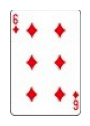

In [14]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image
    self.is_dealt = False

class Player:
  def __init__(self, name):
    self.name = name
    self.cards = []
    self.total_number = 0

class Human(Player):
  def __init__(self):
    super().__init__('You')

class Computer(Player):
  def __init__(self):
    super().__init__('Computer')

def create_cards():
  cards.clear()

  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_card(card):
  print(f"{card.display_name} of {card.mark}")
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card.image)
  plt.show()

def deal_card(player):
  tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
  assert (len(tmp_cards) != 0), "No cards left"

  tmp_card = random.choice( tmp_cards )
  tmp_card.is_dealt = True # This line assigns the card as already assigned to a player

  player.cards.append( tmp_card )
  player.total_number += tmp_card.number

def play():
  print('Debug: play()')
  load_image()
  create_cards()
  players.append( Human() )
  players.append( Computer() )
  deal_card( players[0] )
  # deal_card( players[1] )
  show_card( players[0].cards[0] )
  

play()

Debug: play()
Jack of Hearts
Queen of Spades


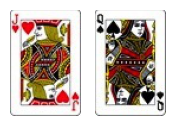

In [17]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number


def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)


play()

Certainly! The `plt.subplot` function in Matplotlib is used to create a grid of subplots within a single figure. Here's a detailed explanation of the parameters and their meaning in the context of `plt.subplot(1, 6, i + 1)`:

### Understanding `plt.subplot`

The `plt.subplot` function allows you to create multiple plots within a single figure window. The function takes three primary parameters:

1. **Number of Rows (`nrows`)**
2. **Number of Columns (`ncols`)**
3. **Current Plot Index (`index`)**

The syntax for `plt.subplot` is:
```python
plt.subplot(nrows, ncols, index)
```

- **`nrows`**: Number of rows in the subplot grid.
- **`ncols`**: Number of columns in the subplot grid.
- **`index`**: The index of the subplot you want to create or select, counting from 1 (top-left) to `nrows * ncols`.

### Parameters in `plt.subplot(1, 6, i + 1)`

In your function:
```python
plt.subplot(1, 6, i + 1)
```

- **`1`**: This indicates that there is 1 row in the subplot grid. This means all subplots will be arranged horizontally in a single row.

- **`6`**: This indicates that there are 6 columns in the subplot grid. With 1 row and 6 columns, the subplots will be arranged in a single row with 6 slots horizontally.

- **`i + 1`**: This determines which subplot slot you are currently working with. It varies as `i` changes with each iteration of the loop:
  - `i + 1` represents the subplot index (ranging from 1 to 6) where `i` is the current iteration index of the loop.

### Visual Representation

Let's break down how `plt.subplot(1, 6, i + 1)` would look visually:

- **When `i = 0`**: `plt.subplot(1, 6, 1)` creates the first subplot in the grid (position 1 in the 1x6 grid).
- **When `i = 1`**: `plt.subplot(1, 6, 2)` creates the second subplot in the grid (position 2 in the 1x6 grid).
- **When `i = 2`**: `plt.subplot(1, 6, 3)` creates the third subplot in the grid, and so on.

This continues until `i = 5`:
- **When `i = 5`**: `plt.subplot(1, 6, 6)` creates the sixth and last subplot in the grid.

### Summary

- **`1`**: There is 1 row in the subplot grid.
- **`6`**: There are 6 columns in the subplot grid.
- **`i + 1`**: Specifies which subplot in the grid is currently being created or accessed, with the subplot index ranging from 1 to 6.

Each call to `plt.subplot(1, 6, i + 1)` positions the current subplot in the appropriate slot within a single horizontal row of 6 plots, allowing you to display up to 6 cards in a single row.

Debug: play()
Jack of Hearts
3 of Diamonds


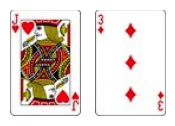

Hit[1] or stand[2] d
Hit[1] or stand[2] S
Hit[1] or stand[2] 3
Hit[1] or stand[2] 2


In [27]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number


def win():
    print("Won")


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    choice()
    if players[0].total_number == 21:
        win()



play()

Debug: play()
Jack of Diamonds
3 of Spades


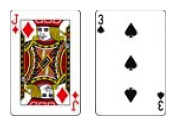

Hit[1] or stand[2] 3
Hit[1] or stand[2] 2


In [30]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number


def win():
    print("Won")


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play_once():
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    choice()


def is_blackjack():
    if players[0].total_number == 21:
        return True
        # win()
    else:
        return False

def play():
    print('Debug: play()')
    play_once()
    # load_image()
    # create_cards()
    # players.append(Human())
    # players.append(Computer())
    # deal_card(players[0])
    # deal_card(players[1])
    # deal_card(players[0])
    # show_cards(players[0].cards)
    # choice()
    # if players[0].total_number == 21:
    #     win()



play()

Debug: play()
Queen of Diamonds
Queen of Spades


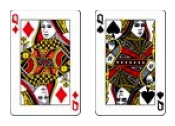

Hit[1] or stand[2] 2


In [41]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number


def win():
    print('Won')


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play_once():
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()



def is_blackjack():
    if (players[0].total_number == 21):
        lost()
        return True
    else:
        return False


def hit():
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    elif is_burst():
        lost()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key ==2:
            stand()

def stand():
    deal_card(players[1])


def lost():
    print('Lost')


def is_burst():
    if (players[0].total_number > 22):
        return True
    else:
        return False



def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())

    play_once()


play()

Debug: play()
6 of Diamonds
Ace of Diamonds


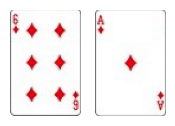

Hit[1] or stand[2] 2


Result
Cards of You:
6 of Diamonds
Ace of Diamonds


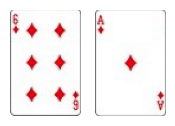

Cards of Computer:
Ace of Hearts
8 of Hearts


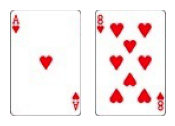

Computer won


In [61]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number
    calc_ace(player)


def calc_ace(player):
    for card in player.cards:
        if player.total_number >= 22:
            if card.number == 11:
                player.total_number -= 10
                card.number = 1


def win():
    print('Won')


def lose():
    print('Lost')


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play_once():
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()


def is_blackjack():
    if (players[0].total_number == 21):
        return True
    else:
        return False


def is_bust():
    if (players[0].total_number >= 22):
        return True
    else:
        return False


def hit():
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    elif is_bust():
        lose()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()
            


def stand():
    deal_card(players[1])
    if (players[1].total_number < 17):
        stand()
    else:
        result = judge()
        show_result(result)
def judge():
    print('Result')
    diff = players[0].total_number - players[1].total_number
    if diff == 0:
        result = 'draw'
    elif diff >= 1:
        result = 'win'
    else:
        result = 'lose'
    return result



def show_result(result):
    for player in players:
        print(f"Cards of {player.name}:")
        show_cards(player.cards)

    if result == 'draw':
        print('Draw')
    elif result == 'win':
        print(f"{players[0].name} won")
    else:
        print(f"{players[1].name} won")


def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())

    play_once()


play()

Debug: play()
9 of Hearts
Jack of Spades


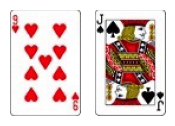

Hit[1] or stand[2] 2


Result
Cards of You:
9 of Hearts
Jack of Spades


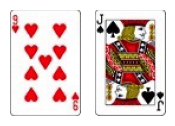

Cards of Computer:
King of Spades
Queen of Clubs


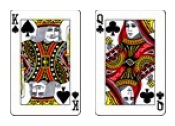

Computer won


In [58]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number


def win():
    print('Won')


def lose():
    print('Lost')


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play_once():
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()


def is_blackjack():
    if (players[0].total_number == 21):
        return True
    else:
        return False


def is_bust():
    if (players[0].total_number >= 22):
        return True
    else:
        return False


def hit():
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    elif is_bust():
        lose()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()


def stand():
    deal_card(players[1])
    if players[1].total_number < 17:
        stand()
    else:
        result = judge()
        show_result(result)


def judge():
    print('Result')
    diff = players[0].total_number - players[1].total_number
    if diff == 0:
        result = 'draw'
    elif diff >= 1:
        result = 'win'
    else:
        result = 'lose'
    return result


def show_result(result):
    for player in players:
        print(f"Cards of {player.name}:")
        show_cards(player.cards)

    if result == 'draw':
        print('Draw')
    elif result == 'win':
        print(f"{players[0].name} won")
    else:
        print(f"{players[1].name} won")


def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())

    play_once()


play()

Debug: play()
6 of Spades
8 of Hearts


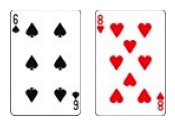

Hit[1] or stand[2] 2


Result
Cards of You:
6 of Spades
8 of Hearts


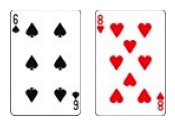

Cards of Computer:
9 of Spades
10 of Clubs


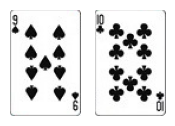

Computer won


In [62]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
display_names = ['Ace', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', 'Jack', 'Queen', 'King']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def load_image():
    image_name = 'cards.jpg'
    vsplit_number = 4
    hsplit_number = 13

    if not os.path.isfile(image_name):
        response = requests.get(
            'https://raw.githubusercontent.com/techgymjp/techgym_python/master/cards.jpg', allow_redirects=False)
        with open(image_name, 'wb') as image:
            image.write(response.content)

    img = cv.imread('./'+image_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    crop_img = img[:h // vsplit_number * vsplit_number,
                   :w // hsplit_number * hsplit_number]

    card_images.clear()
    for h_image in np.vsplit(crop_img, vsplit_number):
        for v_image in np.hsplit(h_image, hsplit_number):
            card_images.append(v_image)


class Card:
    def __init__(self, mark, display_name, number, image):
        self.mark = mark
        self.display_name = display_name
        self.number = number
        self.image = image
        self.is_dealt = False


class Player:
    def __init__(self, name):
        self.name = name
        self.cards = []
        self.total_number = 0


class Human(Player):
    def __init__(self):
        super().__init__('You')


class Computer(Player):
    def __init__(self):
        super().__init__('Computer')


def create_cards():
    cards.clear()

    for i, mark in enumerate(marks):
        for j, number in enumerate(numbers):
            cards.append(
                Card(mark, display_names[j], number, card_images[i*len(numbers)+j]))


def show_cards(cards):
    for i, card in enumerate(cards):
        print(f"{card.display_name} of {card.mark}")
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(card.image)
    plt.show()


def deal_card(player):
    tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
    assert (len(tmp_cards) != 0), "No cards left"

    tmp_card = random.choice(tmp_cards)
    tmp_card.is_dealt = True

    player.cards.append(tmp_card)
    player.total_number += tmp_card.number
    calc_ace(player)


def calc_ace(player):
    for card in player.cards:
        if player.total_number >= 22:
            if card.number == 11:
                player.total_number -= 10
                card.number = 1


def win():
    print('Won')


def lose():
    print('Lost')


def choice():
    message = 'Hit[1] or stand[2]'
    choice_key = input(message)
    while not enable_choice(choice_key):
        choice_key = input(message)
    return int(choice_key)


def enable_choice(string):
    if string.isdigit():
        number = int(string)
        if number >= 1 and number <= 2:
            return True
        else:
            return False
    else:
        return False


def play_once():
    deal_card(players[0])
    deal_card(players[1])
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()


def is_blackjack():
    if (players[0].total_number == 21):
        return True
    else:
        return False


def is_bust(player):
    if (player.total_number >= 22):
        return True
    else:
        return False


def hit():
    deal_card(players[0])
    show_cards(players[0].cards)
    if is_blackjack():
        win()
    elif is_bust(players[0]):
        lose()
    else:
        choice_key = choice()
        if choice_key == 1:
            hit()
        elif choice_key == 2:
            stand()


def stand():
    deal_card(players[1])
    if is_bust(players[1]):
        win()
    else:
        if players[1].total_number < 17:
            stand()
        else:
            result = judge()
            show_result(result)


def judge():
    print('Result')
    diff = players[0].total_number - players[1].total_number
    if diff == 0:
        result = 'draw'
    elif diff >= 1:
        result = 'win'
    else:
        result = 'lose'
    return result


def show_result(result):
    for player in players:
        print(f"Cards of {player.name}:")
        show_cards(player.cards)

    if result == 'draw':
        print('Draw')
    elif result == 'win':
        print(f"{players[0].name} won")
    else:
        print(f"{players[1].name} won")


def play():
    print('Debug: play()')
    load_image()
    create_cards()
    players.append(Human())
    players.append(Computer())

    play_once()


play()